<a href="https://colab.research.google.com/github/hamsterjoa/Machine_Learning_Practical/blob/main/Minimizing_churn_rate_through_analysis_of_financial_habits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [58]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Udemy/input/churn_data.csv')

## EDA

In [59]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [60]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [61]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [62]:
# Removing NaN
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [63]:
dataset = dataset[pd.notnull(dataset['age'])]

In [64]:
dataset = dataset.drop(columns=['credit_score', 'rewards_earned'])

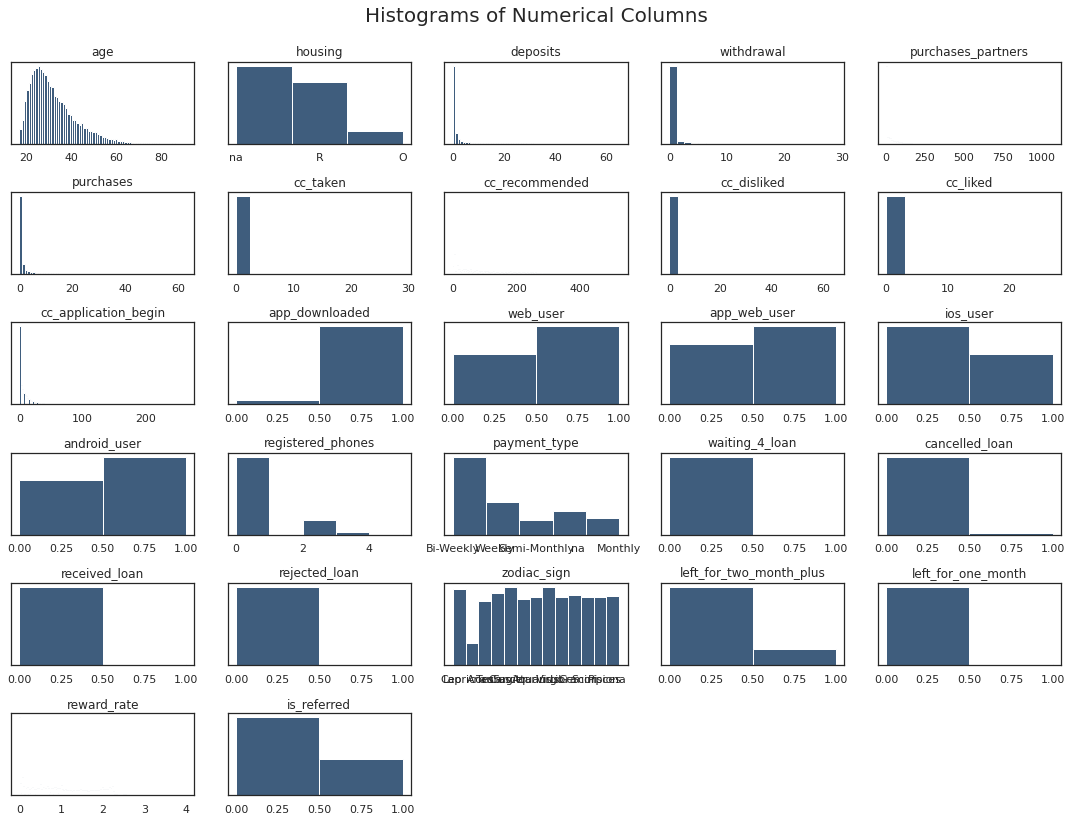

In [65]:
# Histograms
dataset2 = dataset.drop(columns=['user', 'churn'])

fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 5, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

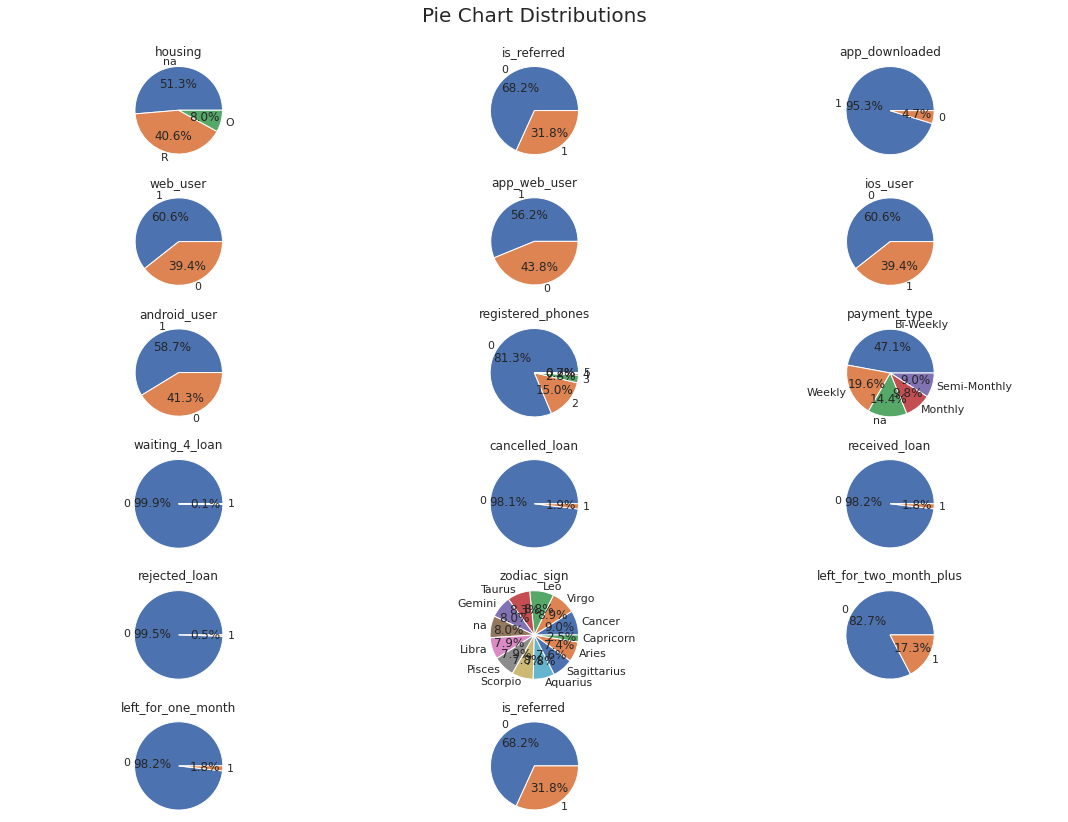

In [66]:
# Pie Plots
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]
        
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
    values = dataset2.iloc[:, i - 1].value_counts(normalize=True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize=True).index
    
    plt.pie(values, labels=index, autopct='%1.1f%%')
    plt.axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [67]:
# Exploring Uneven Features
print(dataset[dataset2.waiting_4_loan == 1].churn.value_counts())
print(dataset[dataset2.cancelled_loan == 1].churn.value_counts())
print(dataset[dataset2.received_loan == 1].churn.value_counts())
print(dataset[dataset2.rejected_loan == 1].churn.value_counts())
print(dataset[dataset2.left_for_one_month == 1].churn.value_counts())

0    27
1     8
Name: churn, dtype: int64
1    274
0    234
Name: churn, dtype: int64
1    292
0    199
Name: churn, dtype: int64
1    107
0     25
Name: churn, dtype: int64
1    266
0    222
Name: churn, dtype: int64


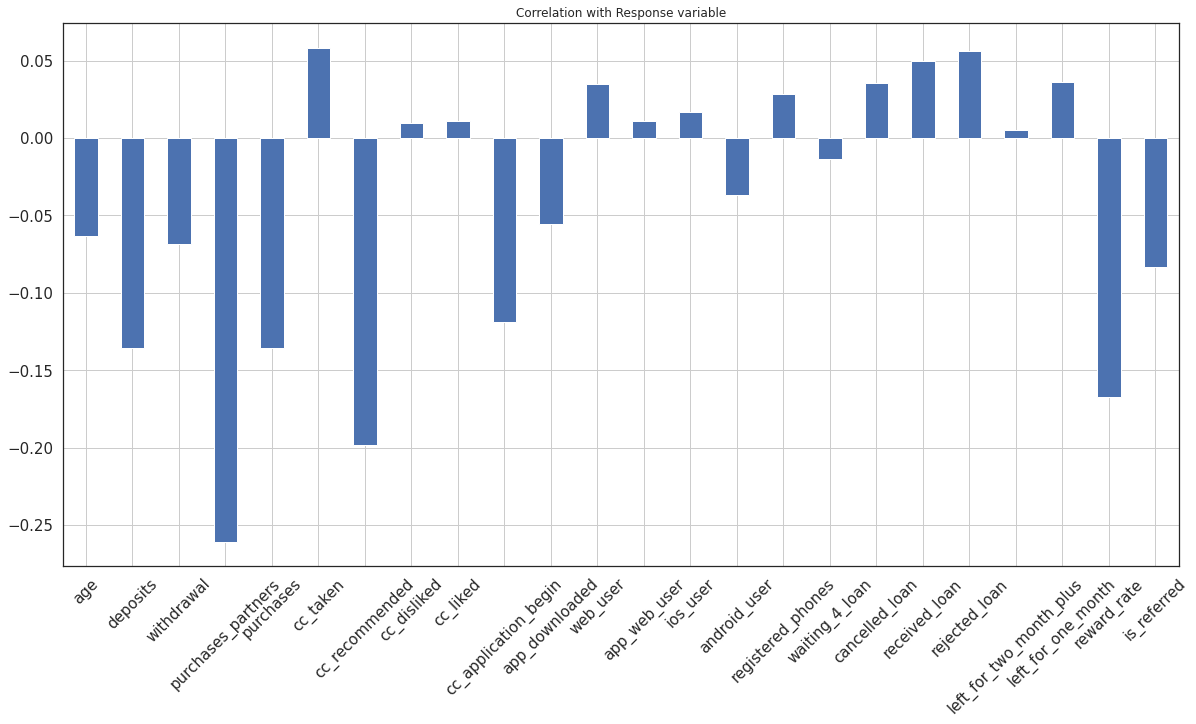

In [68]:
# Corrrelation with Response Variable
dataset.drop(columns=['churn', 'user', 'housing', 
                      'payment_type', 'zodiac_sign']
             ).corrwith(dataset.churn).plot.bar(figsize=(20,10),
                        title = 'Correlation with Response variable',
                        fontsize = 15, rot = 45,
                        grid = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


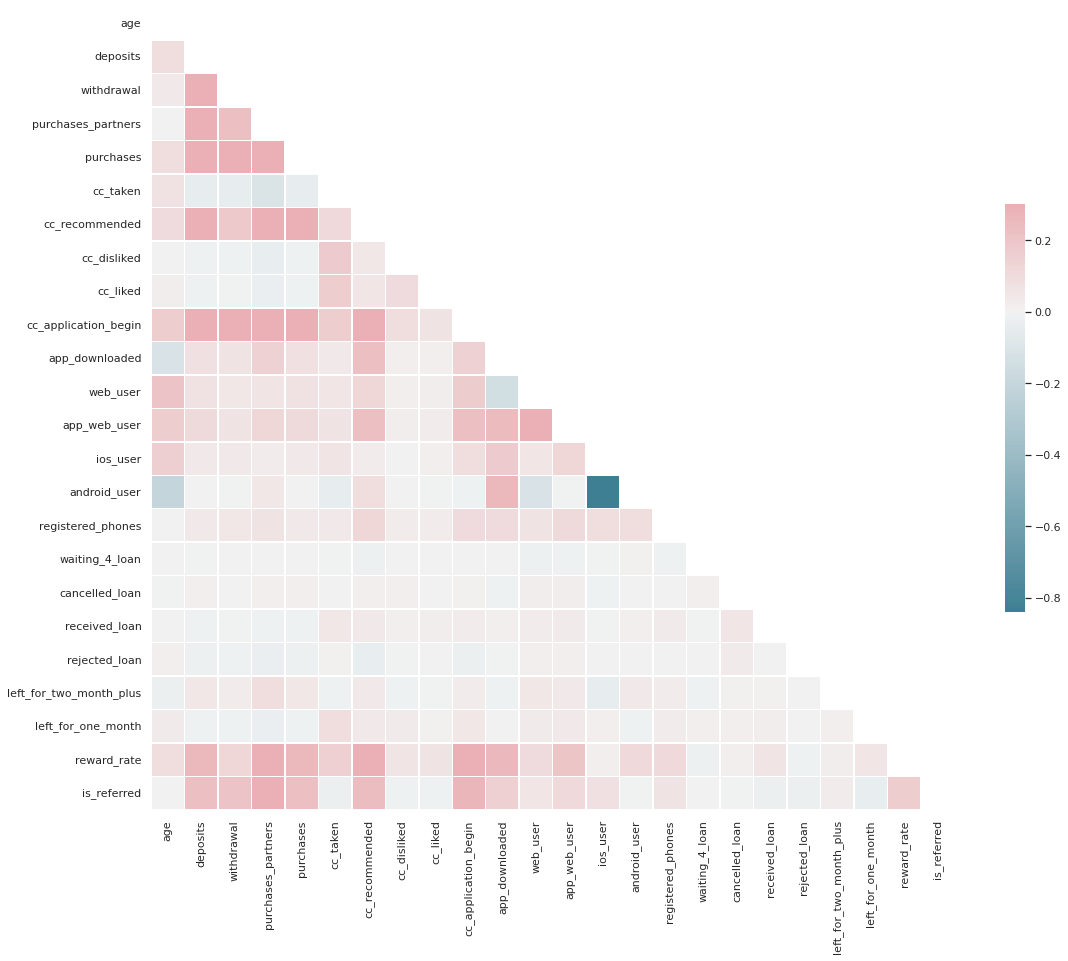

In [69]:
## Correlation Matrix
sn.set(style="white")

# Compute the Correlation matirx
corr = dataset.drop(columns=['user', 'churn']).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink":.5})

상관행렬을 보면, android_user와 ios_user 사이의 관계가 매우 강하게 나오는데 android 유저인 경우, ios를 쓰지 않을 것으므로(반대도 마찬가지) 대부분의 경우 이는 1:1 입니다. 즉 android에서 1이라면 ios에서는 0입니다. 

그러나 이 연관성은 정확히 1:1은 아닙니다. 왜냐하면 android 기기와 ios 기기를 같이 쓰는 사람도 소수라 해도 존재하기 때문입니다. 그렇다면 이러한 특정 필드는 연관성이 강하기 때문에 둘 중 하나를 제거하는게 나을 수 있습니다.

app_web_user은 web_user와 app_downloaded가 1일때 무조건 1이므로 독립 변수가 아닙니다. 따라서 제거해주도록 하겠습니다.

In [70]:
dataset = dataset.drop(columns=['app_web_user'])

In [71]:
dataset.to_csv('new_churn_data.csv', index=False)

## Prepare for a modeling

In [72]:
dataset = pd.read_csv('new_churn_data.csv')

In [73]:
# Data Preparation
user_identifier = dataset['user']
dataset = dataset.drop(columns=['user'])

In [74]:
# One-Hot Encoding
dataset.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [75]:
dataset = pd.get_dummies(dataset)
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [76]:
dataset = dataset.drop(columns=['housing_na', 'zodiac_sign_na', 'payment_type_na'])

In [77]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns='churn'),
                                                    dataset['churn'],
                                                    test_size = 0.2,
                                                    random_state = 0)

In [78]:
# Balancing the Training Set
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [79]:
import random

pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
  higher = pos_index
  lower = neg_index
else:
  lower = pos_index
  higher = neg_index

random.seed(0)
higher = np.random.choice(higher, size = len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes, ]
y_train = y_train.loc[new_indexes]

In [80]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

## Model Building

In [81]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [82]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

### Evaluating Results

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.6142592592592593
0.5236751332706178
0.747538048343778
0.6158952609256869


Test Data Accuracy: 0.6143


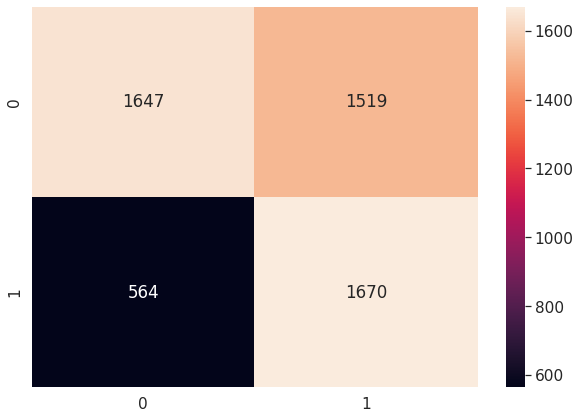

In [84]:
df_cm = pd.DataFrame(cm, index=(0,1), columns=(0,1))
plt.figure(figsize=(10, 7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

### Applying k-Fold Cross Validation

In [85]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier,
                             X = X_train,
                             y = y_train,
                             cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

SVM Accuracy: 0.649 (+/- 0.012)


### Analyzing Coefficients

In [86]:
pd.concat([pd.DataFrame(X_train.columns, columns=["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns=["coef"])],
          axis = 1)

,features,coef
0,age,-0.141689
1,deposits,0.264563
2,withdrawal,0.034847
3,purchases_partners,-0.709836
4,purchases,-0.405004
5,cc_taken,0.074459
6,cc_recommended,0.029149
7,cc_disliked,-0.012789
8,cc_liked,-0.012682
9,cc_application_begin,0.067941


## Feature Selection

In [87]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [88]:
X_train.shape

(17880, 41)

In [89]:
# Model to Test
classifier = LogisticRegression()
# Select Best X Features
rfe = RFE(classifier, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [90]:
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

[ True  True  True  True  True  True  True False False  True False  True
  True False  True False  True  True  True  True  True  True False  True
 False False False False  True  True False False False False False False
 False False False False False]
[ 1  1  1  1  1  1  1 15 16  1 18  1  1 17  1  4  1  1  1  1  1  1 10  1
  6  2  9  5  1  1 14 11  3  7 20  8 13 22 21 19 12]


Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'cc_application_begin', 'web_user',
       'ios_user', 'registered_phones', 'cancelled_loan', 'received_loan',
       'rejected_loan', 'left_for_two_month_plus', 'left_for_one_month',
       'reward_rate', 'housing_O', 'payment_type_Weekly',
       'zodiac_sign_Aquarius'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


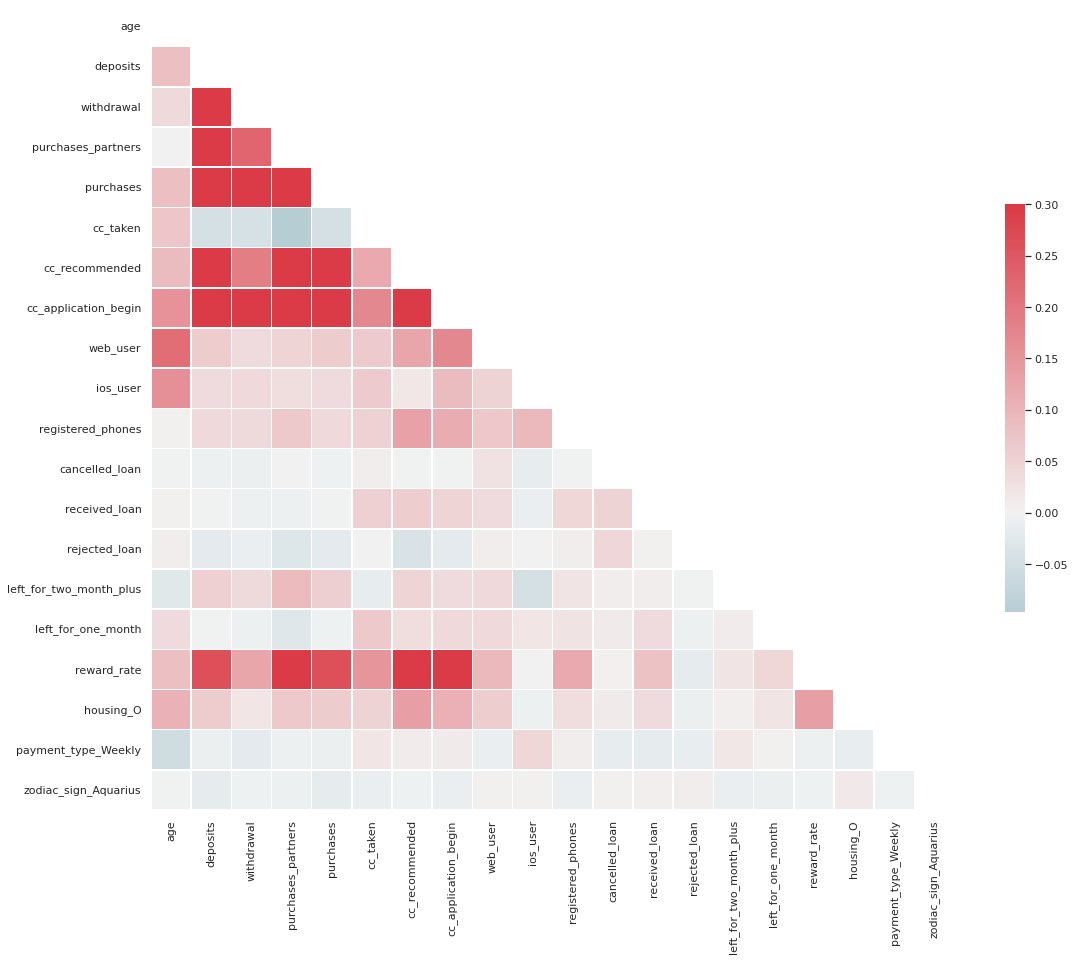

In [91]:
# New Correlation Matrix
sn.set(style="white")

# Compute the correlation matrix
corr = X_train[X_train.columns[rfe.support_]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})  

In [92]:
# Fitting Model to the Training Set
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

LogisticRegression(random_state=0)

In [93]:
# Predicting Test Set
y_pred = classifier.predict(X_test[X_test.columns[rfe.support_]])
# Evaluating Results
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.6077777777777778
0.518125
0.7421665174574754
0.610231873389768


Test Data Accuracy: 0.6078


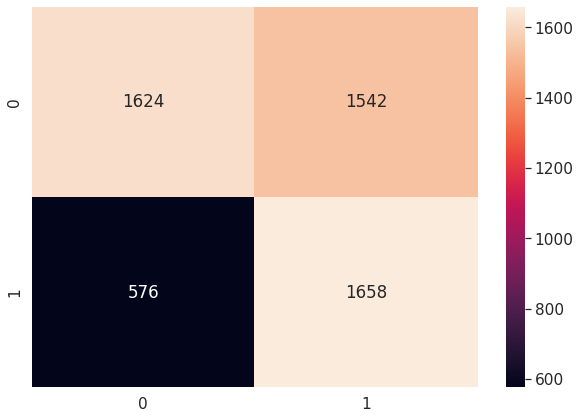

In [94]:
df_cm = pd.DataFrame(cm, index=(0,1), columns=(0,1))
plt.figure(figsize=(10, 7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

해당 과정을 통해 이 모델 내에 새로운 정보를 전혀 제공하지 않는 열 20개를 찾았습니다. 우리는 유저의 해지 여부를 예측하는 모델을 구축하고자 했습니다. 그러나 많은 필드가 해지와는 연관이 전혀 없어서 사실 쓸모가 없었습니다. 이를 검증하기 위해 이들을 다 혹은 절반을 잘라내도 결과는 같았습니다.

즉, 첫 20개 필드에 대부분의 가중치, 대부분의 예측력이 있었다는 뜻입니다. 따라서 이 20개의 열을 활용할 것입니다.

In [95]:
# Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier,
                             X = X_train[X_train.columns[rfe.support_]],
                             y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

SVM Accuracy: 0.647 (+/- 0.015)


In [96]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train[X_train.columns[rfe.support_]].columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.141529
1,deposits,0.273890
2,withdrawal,0.039149
3,purchases_partners,-0.695350
4,purchases,-0.412464
5,cc_taken,0.070627
6,cc_recommended,0.038076
7,cc_application_begin,0.071546
8,web_user,0.122657
9,ios_user,0.061787


In [97]:
# Formatting Final Results
final_results = pd.concat([y_test, user_identifier], axis=1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)

In [98]:
final_results

,user,churn,predicted_churn
0,61353,1.0,1
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0
...,...,...,...
5395,22377,0.0,1
5396,24291,1.0,1
5397,23740,0.0,1
5398,47663,1.0,0


## Conclusion
- 모델은 어떤 사용자가 변화할 가능성이 있는지에 대한 지표를 제공해주었습니다. 우리는 사용자가 해지하는 정확한 방식(예: 시간 프레임)이 아니라 제품과의 중단을 나타내는 기능만 측정하는 데 초점을 맞추고 있기 때문에 예상 전환 날짜를 의도적으로 열어 두었습니다. 이 사례 연구에서 우리는 확실히 우리를 떠날 사람들이 아니라 앱에 흥미를 잃기 시작하는 사람들을 위해 새로운 제품을 만드는 것을 목표로 하기 때문에 조금이라도 흔들릴 가능성이 있는 사람들을 이해하기 위해 이 개방적인 강조를 선택했습니다.

- 새로운 제품 기능을 만든 후 모델이 사용자 수를 줄일 것으로 예측하기 시작한다면 고객이 우리가 제공하는 서비스에 더 많이 참여하고 있다고 가정할 수 있습니다. 새로운 기능(예: 여론조사)에 대한 사용자의 의견을 물어봄으로써 이러한 노력을 추진할 수 있을 것입니다. 만약 우리가 더 정확하게 변화를 예측하고 싶다면, 우리를 떠나는 사람들을 엄격하게 강조하기 위해, 우리는 모델에 더 정확성을 더할 시간 차원을 추가할 수 있습니다.